A project with an Ecommerce company based in London sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've asked to help them figure it out. 
We worked with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:
•	Avg. Session Length: Average session of in-store style advice sessions.
•	Time on App: Average time spent on App in minutes
•	Time on Website: Average time spent on Website in minutes
•	Length of Membership: How many years the customer has been a member.
•	Yearly Amount Spent: The total amount the customer is spending.
Business problem: Interpret which variables are contributing towards the more annual income prediction


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 6CA3-2EE7

 Directory of C:\Users\gokul\OneDrive\Documents\excelr\project\data

29-03-2022  01:00 PM    <DIR>          .
29-03-2022  01:00 PM    <DIR>          ..
16-03-2022  09:52 PM    <DIR>          .ipynb_checkpoints
16-03-2022  09:48 PM            14,850 Ecommerce project.docx
16-03-2022  09:48 PM            40,116 Ecommerce.csv
26-03-2022  01:08 PM           364,224 ecommerce.pptx
28-03-2022  01:01 PM         1,158,639 project.ipynb
26-03-2022  01:02 PM    <DIR>          scs
               4 File(s)      1,577,829 bytes
               4 Dir(s)  129,469,276,160 bytes free


In [6]:
data=pd.read_csv("Ecommerce.csv")

In [5]:
data.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


In [6]:
data.tail()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
618,619,31.941434,11.158640,36.846959,3.219605,559.546775
619,620,33.446133,12.374820,37.592235,4.917733,515.186966
620,621,32.967749,11.392061,36.916664,2.955718,601.715746
621,622,33.469949,11.930872,37.744155,4.577850,477.741395
622,623,33.443393,12.978933,37.311979,3.575459,390.149419


throwing out useless columns

In [7]:
data_cleaned=data.drop("Customer ID",axis=1)

In [8]:
data.shape

(623, 6)

checking datatypes

In [9]:
data.dtypes

Customer ID               int64
Avg Session length      float64
Time on App             float64
Time on Website         float64
Length of MemberShip    float64
Yealy amount spent      float64
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer ID           623 non-null    int64  
 1   Avg Session length    623 non-null    float64
 2   Time on App           623 non-null    float64
 3   Time on Website       623 non-null    float64
 4   Length of MemberShip  623 non-null    float64
 5   Yealy amount spent    623 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 29.3 KB


checking for null values

In [11]:
data.isna().sum()

Customer ID             0
Avg Session length      0
Time on App             0
Time on Website         0
Length of MemberShip    0
Yealy amount spent      0
dtype: int64

there is no null values 

checking for duplicated values

In [12]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
618    False
619    False
620    False
621    False
622    False
Length: 623, dtype: bool

In [13]:
data.duplicated().sum()

0

no duplicated values

In [14]:
data.nunique()

Customer ID             623
Avg Session length      623
Time on App             623
Time on Website         623
Length of MemberShip    623
Yealy amount spent      623
dtype: int64

In [15]:
data.head()

,Customer ID,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,1,32.538350,12.028846,35.850540,3.648854,576.098273
1,2,34.206718,12.226851,37.246443,1.987536,460.784955
2,3,31.535240,11.814341,36.610697,3.351191,349.739791
3,4,32.199577,11.295163,37.425695,5.234337,547.709921
4,5,33.570137,13.500972,36.856165,3.938603,487.055641


checking for outlier and distribution for column 'Avg Session length'

<AxesSubplot:xlabel='Avg Session length', ylabel='Density'>

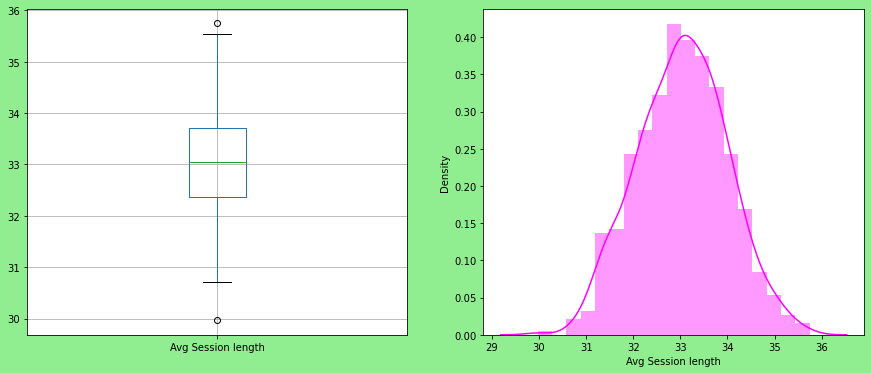

In [16]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.subplot(1,2,1)
data.boxplot(column=['Avg Session length'])
plt.subplot(1,2,2)
sns.distplot(data['Avg Session length'],color="magenta")

outliers are there but data is normally distributed

checking for outlier and distribution for column 'Time on App'

<AxesSubplot:xlabel='Time on App', ylabel='Density'>

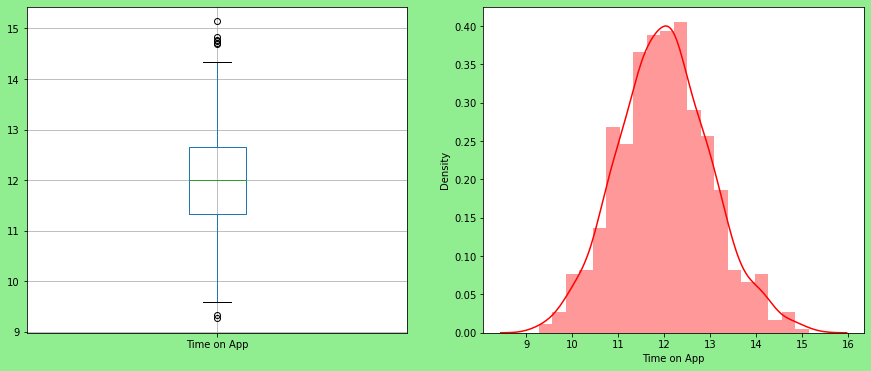

In [17]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.subplot(1,2,1)
data.boxplot(column=['Time on App'])
plt.subplot(1,2,2)
sns.distplot(data['Time on App'],color="red")

outliers are there but data is normally distributed

checking for outlier and distribution for column 'Length of MemberShip'

<AxesSubplot:xlabel='Length of MemberShip', ylabel='Density'>

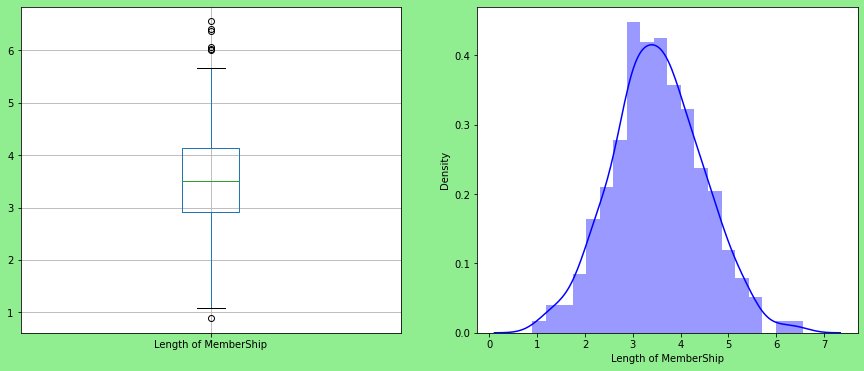

In [18]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.subplot(1,2,1)
data.boxplot(column=['Length of MemberShip'])
plt.subplot(1,2,2)
sns.distplot(data['Length of MemberShip'],color="blue")

outliers are there but data is normally distributed

checking for outlier and distribution for column 'Yealy amount spent'

<AxesSubplot:xlabel='Yealy amount spent', ylabel='Density'>

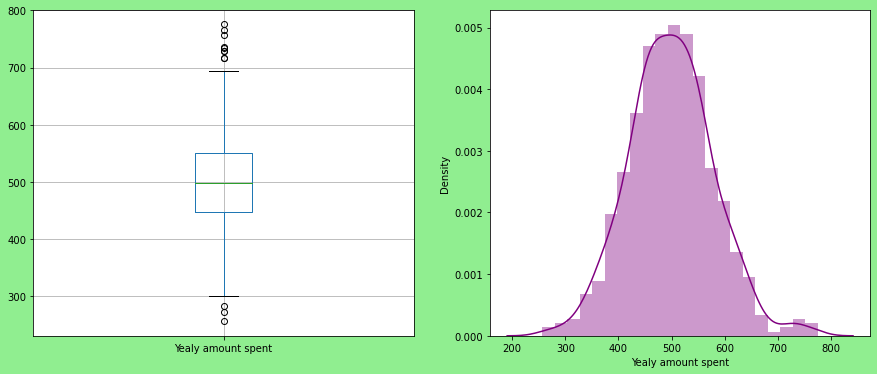

In [19]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.subplot(1,2,1)
data.boxplot(column=['Yealy amount spent'])
plt.subplot(1,2,2)
sns.distplot(data['Yealy amount spent'],color="purple")

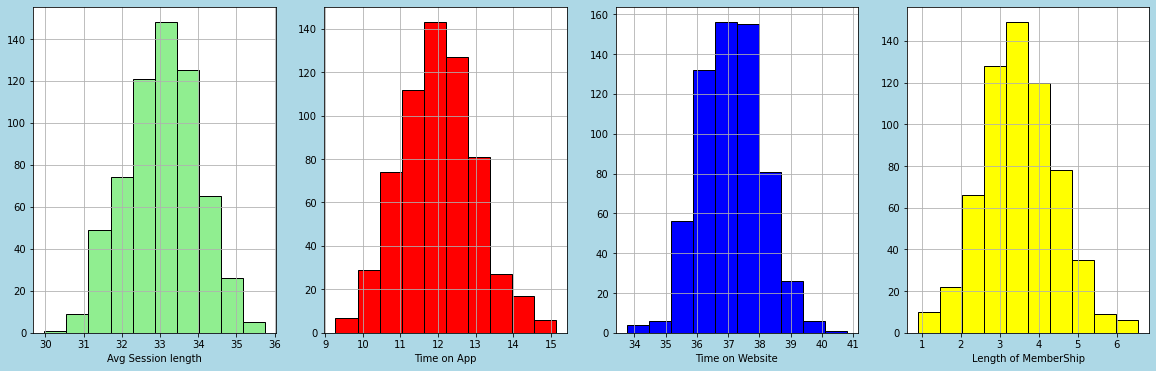

In [20]:
plt.figure(figsize=(20,6),facecolor="lightblue")
plt.subplot(1,4,1)
data_cleaned["Avg Session length"].hist(color="lightgreen",edgecolor="black")
plt.xlabel("Avg Session length")
plt.subplot(1,4,2)
data_cleaned["Time on App"].hist(color="red",edgecolor="black")
plt.xlabel("Time on App")
plt.subplot(1,4,3)
data_cleaned["Time on Website"].hist(color="blue",edgecolor="black")
plt.xlabel("Time on Website")
plt.subplot(1,4,4)
data_cleaned["Length of MemberShip"].hist(color="yellow",edgecolor="black")
plt.xlabel("Length of MemberShip")
plt.show()

outliers are there but data is normally distributed

In [21]:
data_cleaned.corr()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
Avg Session length,1.000000,-0.001234,0.050231,-0.010919,-0.042764
Time on App,-0.001234,1.000000,0.040029,0.029839,-0.012348
Time on Website,0.050231,0.040029,1.000000,0.036788,0.084305
Length of MemberShip,-0.010919,0.029839,0.036788,1.000000,-0.030451
Yealy amount spent,-0.042764,-0.012348,0.084305,-0.030451,1.000000


<AxesSubplot:>

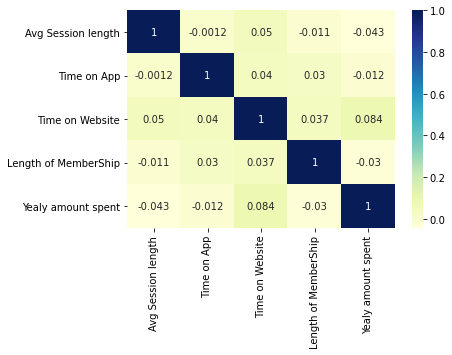

In [22]:
sns.heatmap(data_cleaned.corr(),cmap="YlGnBu",annot=True)

none of the features are too correlated

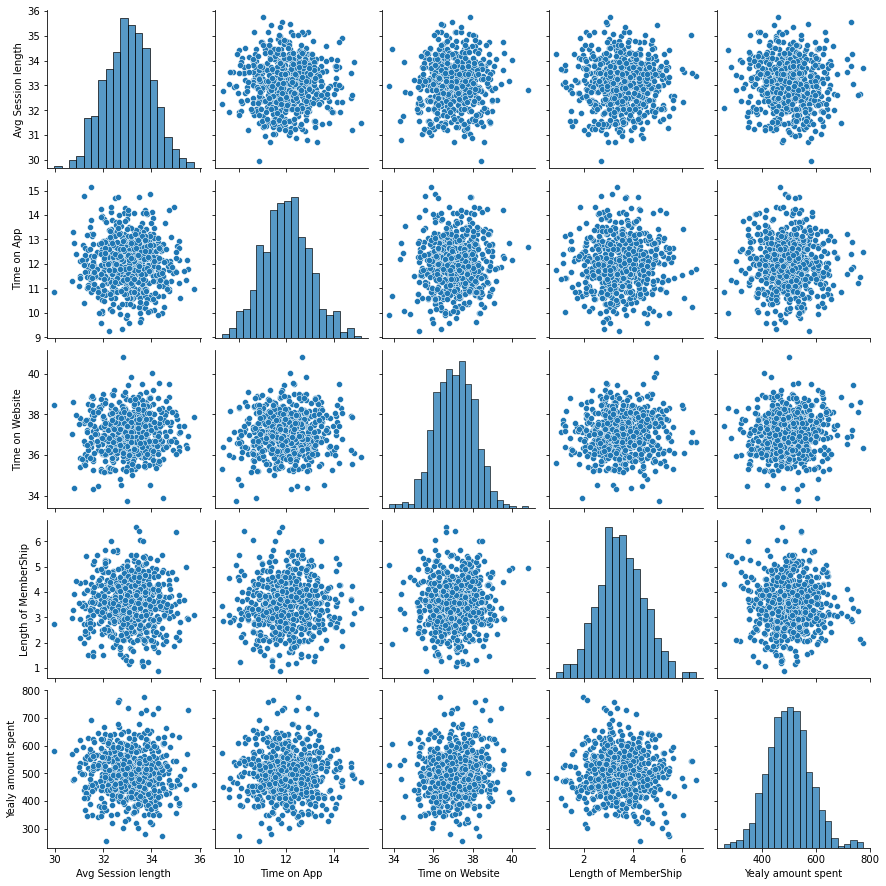

In [23]:
sns.pairplot(data_cleaned)

# model building

# decision tree regression

In [1]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

In [8]:
data_cleaned.head()

,Avg Session length,Time on App,Time on Website,Length of MemberShip,Yealy amount spent
0,32.538350,12.028846,35.850540,3.648854,576.098273
1,34.206718,12.226851,37.246443,1.987536,460.784955
2,31.535240,11.814341,36.610697,3.351191,349.739791
3,32.199577,11.295163,37.425695,5.234337,547.709921
4,33.570137,13.500972,36.856165,3.938603,487.055641


In [18]:
x=data_cleaned.iloc[:,:-1]
y=data_cleaned.iloc[:,-1]

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [20]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [21]:
from sklearn import metrics

In [22]:
pred=model.predict(x_test)
##metrics.mean_squared_error(y_test,pred)

In [23]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.18844569269776895

In [24]:
metrics.mean_absolute_error(y_test,pred)

86.47458698960001

In [38]:
#tree.plot_tree(model)

In [26]:
model.feature_importances_

array([0.20649697, 0.2364636 , 0.26567289, 0.29136654])

# Random forest regression model

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [33]:
x=data_cleaned.iloc[:,:-1]
y=data_cleaned.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [34]:
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
y_pred=model2.predict(x_test)

In [36]:
metrics.mean_absolute_percentage_error(y_test,y_pred)

0.15853443114701926

In [37]:
model2.feature_importances_

array([0.24303608, 0.23634452, 0.26027732, 0.26034208])

# bagging regression model

In [27]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
x=data_cleaned.iloc[:,:-1]
y=data_cleaned.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=20)

In [48]:
model4=BaggingRegressor()
model4.fit(x_train,y_train)

BaggingRegressor()

In [49]:
ypredict=model4.predict(x_test)

In [50]:
metrics.mean_absolute_percentage_error(y_test,ypredict)

0.17314767371961057